In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload 2
from EpidemicForecaster import SISForecaster
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Read In. 

In [50]:
df = pd.read_csv('../data/covid_data.csv')

In [51]:
df

,Date,Italy,Belgium,France,Germany,Spain,Netherlands
0,2020-02-20,3,NaN,NaN,NaN,NaN,NaN
1,2020-02-21,20,NaN,NaN,NaN,NaN,NaN
2,2020-02-22,79,NaN,NaN,NaN,NaN,NaN
3,2020-02-23,150,NaN,NaN,NaN,NaN,NaN
4,2020-02-24,227,NaN,NaN,16.0,4.0,NaN
5,2020-02-25,320,NaN,13.0,18.0,8.0,NaN
6,2020-02-26,445,NaN,18.0,21.0,14.0,NaN
7,2020-02-27,650,NaN,38.0,26.0,26.0,1.0
8,2020-02-28,888,NaN,57.0,53.0,45.0,2.0
9,2020-02-29,1128,NaN,100.0,66.0,59.0,6.0


# Model definition and fit

In [52]:
COUNTRY = 'Italy'

In [60]:
model = SISForecaster()

series_to_fit = df.loc[:, COUNTRY].dropna().reset_index(drop=True)

model.fit(
    series_to_fit.index,
    series_to_fit.values, 
    p0=[1, 1, 1]
)

(array([1.49932025e-05, 2.26379851e-01, 5.93452489e-03]),
 array([[1.23363913e-12, 5.31262436e-09, 4.81527857e-10],
        [5.31262436e-09, 2.65641950e-05, 2.55055749e-06],
        [4.81527857e-10, 2.55055749e-06, 2.50815874e-07]]))

# Let's predict!

In [61]:
x_vals = np.arange(50) # 50 days

In [62]:
model.predict(
    x_vals
)

array([  168.50548576,   211.17908465,   264.6166825 ,   331.50891996,
         415.20510602,   519.86657468,   650.65126096,   813.93324443,
        1017.55979877,  1271.1459435 ,  1586.40188269,  1977.4810387 ,
        2461.32440447,  3057.95928837,  3790.68610772,  4686.05563397,
        5773.50335714,  7084.47426817,  8650.85417744, 10502.54517576,
       12664.11248352, 15150.61530336, 17963.0216569 , 21083.95387866,
       24474.80447345, 28075.33050065, 31806.52050789, 35576.80296011,
       39290.71994297, 42858.39826579, 46203.87972799, 49270.75707075,
       52024.41271352, 54451.08664373, 56554.65724669, 58352.2556373 ,
       59869.71104663, 61137.51038039, 62187.61295717, 63051.19131804,
       63757.20252986, 64331.6195053 , 64797.13948664, 65173.20838988,
       65476.23429958, 65719.89866895, 65915.50386622, 66072.31884142,
       66197.90120656, 66298.38511969])

# Plot the results
### Possible issues with the analysis: 
- The forecasted number is always lower than the reality because the actual observed number is underestimated. 
- Also, the fit tends to underestimate the values a bit itself
- I assumed that the errors are gaussian, which may not be the case (maybe change the error estimates to a bootstrap)
- The function we are fitting is always increasing. This should skew the error estimates (the lower bar)

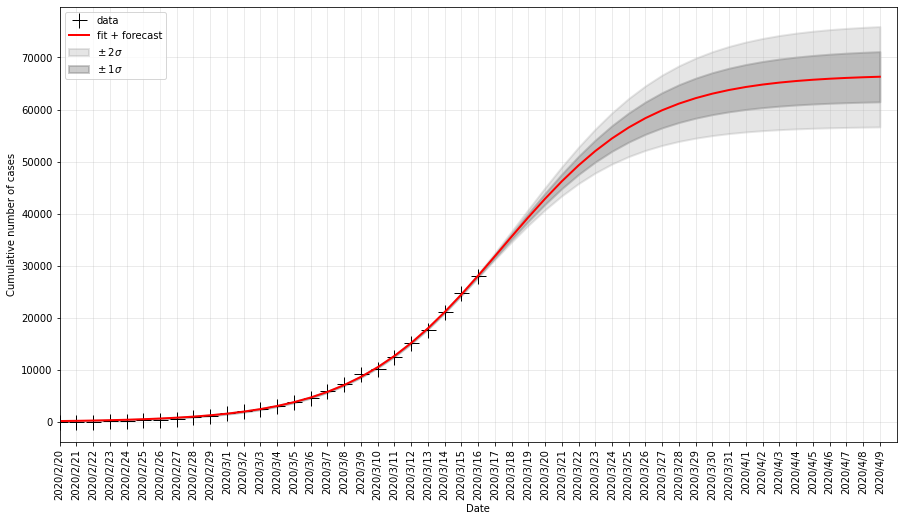

In [63]:
# TODO:  Figure out a nicer way to do this.
x_date_labels = pd.date_range(
    start=df.loc[:, ['Date', COUNTRY]].dropna().iloc[0].loc['Date'], 
    periods=x_vals.shape[0]
).to_series()\
.apply(
    lambda x: '%i/%i/%i' % (x.year, x.month, x.day)
)

model.plot(x_date_labels)

In [64]:
# next prediction
print (
    f'next day: '
    f'{model._pred_y[series_to_fit.shape[0]].round(0)}'
    f' +- {model._sigma[series_to_fit.shape[0]].round(0)}'
)

next day: 31807.0 +- 315.0


In [65]:
# saturation point
print (
    f'total: '
    f'{model._pred_y[-1].round(0)}'
    f' +- {model._sigma[-1].round(0)}'
)

total: 66298.0 +- 4818.0


In [69]:
# inflection points
print (
    f'inflection pt: {model.inflection_point()} days from beginning'
)

inflection pt: 26.4 days from beginning


# Model behavior
- This cell just produces the model behavior if one of the three parameters is varied

In [67]:
model._inflection_pt_formula

[log((-a + c)/a)/b]

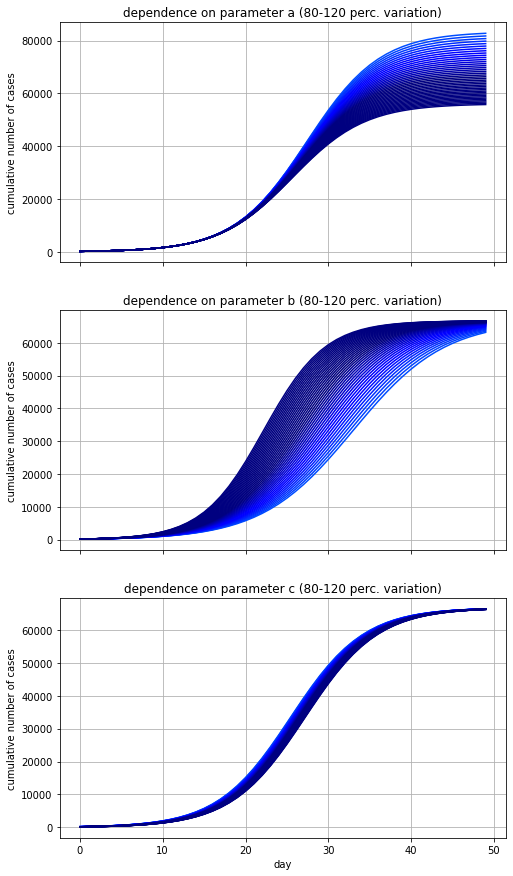

In [68]:
p = model._fit_params

fig, ax = plt.subplots(
    nrows=3, 
    ncols=1, 
    sharex=True, 
    figsize=(8, 15)
)
for c in np.arange(0.8, 1.2, 0.01):
    color = plt.cm.jet(1-c)
    ax[0].plot(
        x_vals, 
        model.model(x_vals, c*p[0], p[1], p[2]), 
        c=color
    )
    ax[1].plot(
        x_vals, 
        model.model(x_vals, p[0], c*p[1], p[2]), 
        c=color
    )
    ax[2].plot(
        x_vals, 
        model.model(x_vals, p[0], p[1], c*p[2]), 
        c=color
    )

    for a, param in zip(ax, ['a', 'b', 'c']): 
        a.set_title('dependence on parameter %s (80-120 perc. variation)' %param)
        a.set_ylabel('cumulative number of cases')
        a.grid(True)
    ax[2].set_xlabel('day')

plt.show()